In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import euler1W as arch 
import torch
from torch import nn
# warnings.filterwarnings('ignore')
Uo1 = np.load('../data/L63-trajectories/train1.npy')
Uo2 = np.load('../data/L63-trajectories/train2.npy')
Uo3 = np.load('../data/L63-trajectories/train3.npy')
Uo4 = np.load('../data/L63-trajectories/train4.npy')
Uo5 = np.load('../data/L63-trajectories/train5.npy')
Uo6 = np.load('../data/L63-trajectories/train6.npy')
Uo7 = np.load('../data/L63-trajectories/train7.npy')
Uo8 = np.load('../data/L63-trajectories/train8.npy')
Uo9 = np.load('../data/L63-trajectories/train9.npy')
Uo10 = np.load('../data/L63-trajectories/train10.npy')

Vo = np.load('../data/L63-trajectories/test.npy')
L0, L1 = 0.4, 3.5
D, D_r, B = 3, 256, 2
beta = 4e-5
m = 500
B_list = [1, 2]

description = "This experiment tests the forecasting skill of Euler1W architecture."
experimentFolder = f'../data/Euler1W-{D_r}'
ut.makeDir(experimentFolder)

In [2]:
tau_f = []
for B in B_list:
    rfm = arch.DeepRF(D_r, B, L0, L1, Uo1, beta, name=f'Euler1W-depth-{B}', save_folder=experimentFolder)
    rfm.init()
    tau_f.append(rfm.compute_tau_f_(Vo[0:m])[1])

Time taken by sample is 0.0048 seconds
Time taken by compute_tau_f_ is 7.8673 seconds
Time taken by sample is 0.0045 seconds
Time taken by sample is 0.0301 seconds
Time taken by compute_tau_f_ is 16.2482 seconds


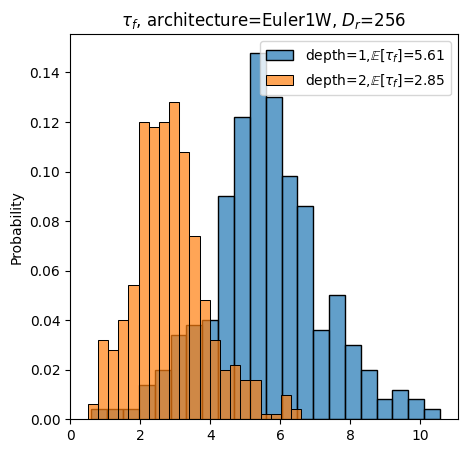

In [3]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
for i, B in enumerate(B_list):
    sns.histplot(tau_f[i], ax=ax, label=f'depth={B},'+r'$\mathbb{E}[\tau_f]$'+f'={tau_f[i].mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_title(fr'$\tau_f$, architecture=Euler1W, $D_r$={D_r}')
plt.savefig(f'../data/{experimentFolder}/euler1W-tau_f-D_r-{D_r}.png', bbox_inches='tight', dpi=300)

In [4]:
class Tau:
    def __init__(self, depthList, tau_f):
        self.depthList = B_list
        self.tau_f = tau_f
        self.meanTau_f = [tau.mean() for tau in tau_f]
        self.name = "Forecast Time"
        
tau = Tau(B_list, tau_f)
expLogger = ut.ExperimentLogger(experimentFolder, description)
expLogger.add(rfm, tau)